# Pile-up algorithm

## Data Conversion

Goal: ALL DATA -> Portions of 100 events

1. Split in the variables ```si1``` and ```si2```
2. Separate Timebase
3. Split variables ```siX``` in portions of 100 events

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
base = np.loadtxt("csi_20231006_t-162.5.csv", skiprows = 1, delimiter = ",", dtype = np.float64)
base = base.T

In [71]:
tbase = base[0][0:43749]
print(tbase[43748])
len_rest = 43749-len(base[1])%43749
si1 = np.append(base[1], np.zeros(len_rest))
si1 = np.reshape(si1, (len(si1)//43749, 43749))
len_rest = 43749-len(base[2])%43749
si2 = np.append(base[2], np.zeros(len_rest))
si2 = np.reshape(si2, (len(si2)//43749, 43749))
#sibase = np.reshape(base[1:2], (43750, len(base[1])//43749))
#print(tbase)
#print(sibase)

(43749,)
6.299755e-06


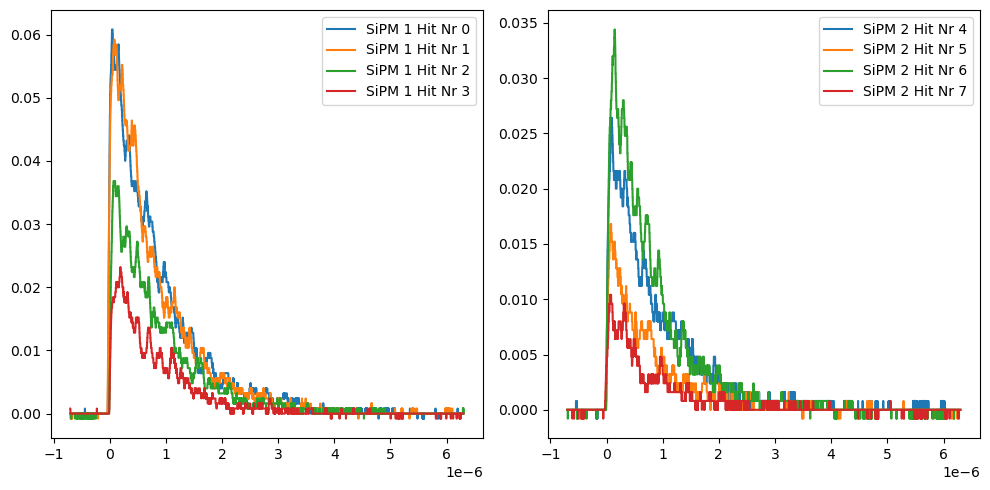

In [51]:
evlow = 4
evhigh = 8
plt.figure(figsize = (10, 5))
plt.subplot(121)
for i in range(evlow, evhigh):
    plt.plot(tbase, si1[i], label = "SiPM 1 Hit Nr " + str(i))
plt.ylabel("Voltage [V]")
plt.xlabel("Time [s]")
plt.legend()
plt.subplot(122)
for i in range(evlow, evhigh):
    plt.plot(tbase, si2[i], label = "SiPM 2 Hit Nr " + str(i))
plt.ylabel("Volts")
plt.legend()
plt.tight_layout()
plt.show()

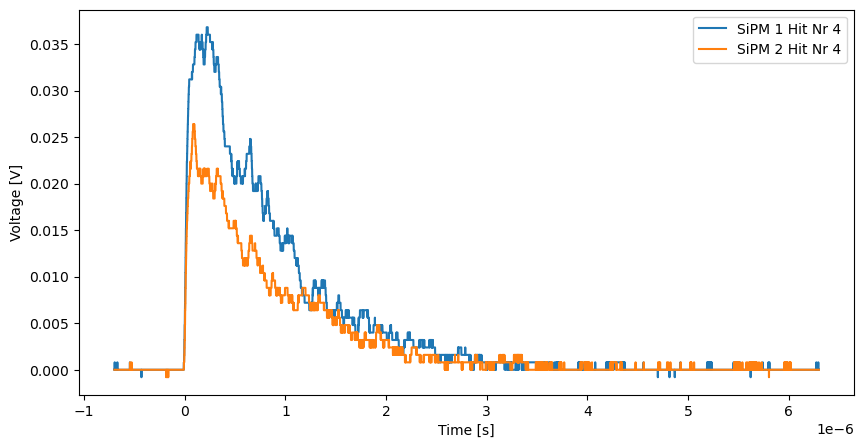

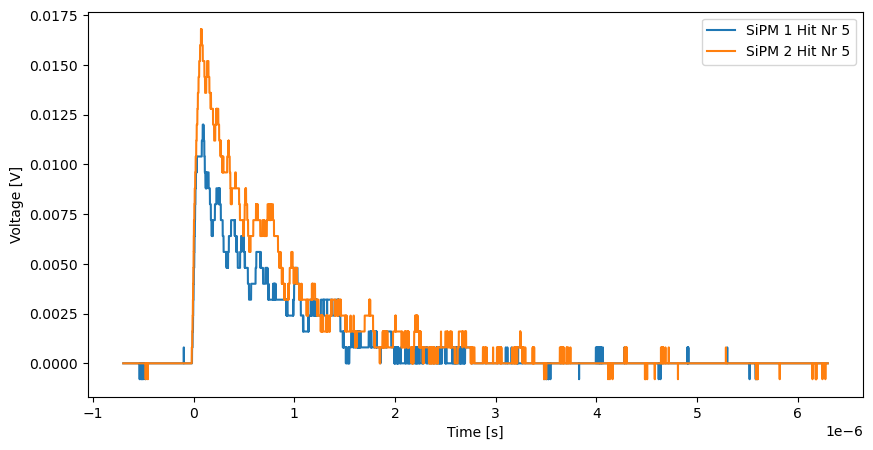

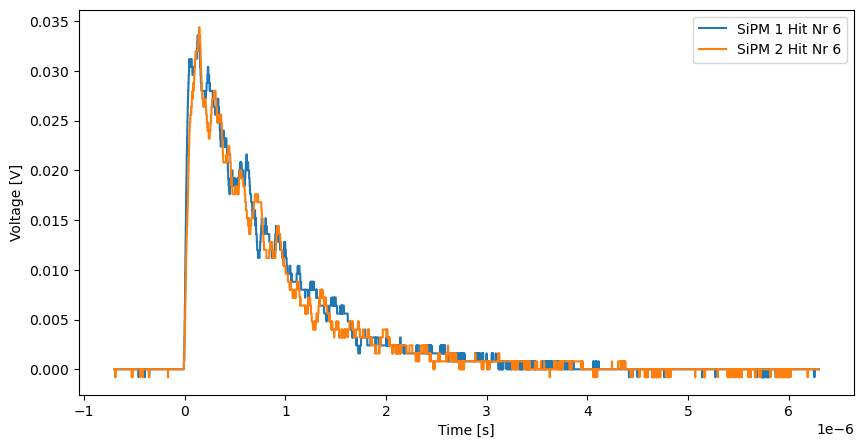

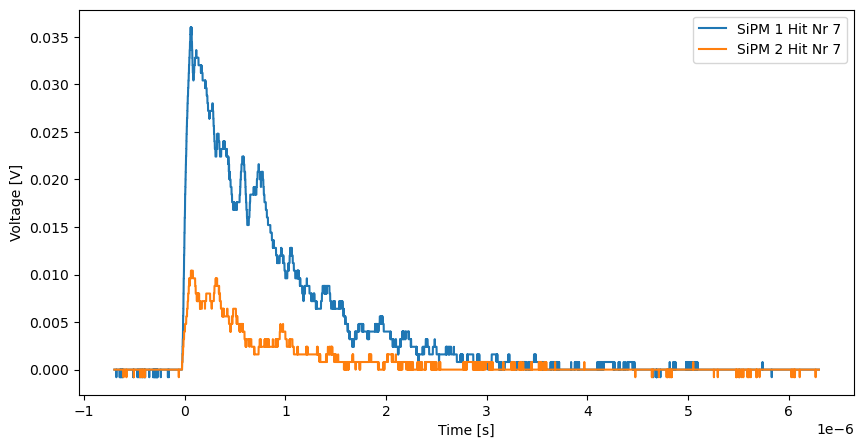

In [52]:
for i in range(evlow, evhigh):
    plt.figure(figsize = (10, 5))
    plt.plot(tbase, si1[i], label = "SiPM 1 Hit Nr " + str(i))
    plt.plot(tbase, si2[i], label = "SiPM 2 Hit Nr " + str(i))
    plt.ylabel("Voltage [V]")
    plt.xlabel("Time [s]")
    plt.legend()
    plt.show()

In [72]:
#print(len(si1.T[0])//100)
np.savetxt("tbase.csv", tbase, delimiter = ",")
for i in range(len(si1.T[0])//100):
    np.savetxt("sipm1data" + str(i) + ".csv", si1[100*i:100*i + 99], delimiter = ",")
    np.savetxt("sipm2data" + str(i) + ".csv", si2[100*i:100*i + 99], delimiter = ",")

20


In [70]:
test = np.loadtxt("sipm1data0.csv", delimiter = ",")
#print(test, np.shape(test))

[[-6.9388939e-18 -6.9388939e-18 -6.9388939e-18 ... -6.9388939e-18
  -6.9388939e-18 -6.9388939e-18]
 [-6.9388939e-18 -6.9388939e-18 -6.9388939e-18 ... -6.9388939e-18
  -6.9388939e-18 -6.9388939e-18]
 [-6.9388939e-18 -6.9388939e-18 -6.9388939e-18 ...  8.0000000e-04
   8.0000000e-04  8.0000000e-04]
 ...
 [-6.9388939e-18 -6.9388939e-18 -6.9388939e-18 ... -6.9388939e-18
  -6.9388939e-18 -6.9388939e-18]
 [ 8.0000000e-04  8.0000000e-04  8.0000000e-04 ... -6.9388939e-18
  -6.9388939e-18 -6.9388939e-18]
 [-6.9388939e-18 -6.9388939e-18 -6.9388939e-18 ... -6.9388939e-18
  -6.9388939e-18 -6.9388939e-18]] (99, 43749)
